<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Regression Error Metrics

Data available at https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

The dataset contains data collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three ambient variables affect the GT performance.

Features consist of hourly average ambient variables 
- AT: Ambient Temperature in °C,
- AP: Ambient Pressure in milibar,
- RH: Relative Humidity in %
- V: Exhaust Vacuum in cm Hg
- PE (target): Net hourly electrical energy output in MW  

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'CCPP_data.csv':'https://storage.googleapis.com/aipi_datasets/CCPP_data.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [3]:
# Read in the data
def load_data(filename):
        data = pd.read_csv(filename)
        return data

ccpp_data = load_data('CCPP_data.csv')
print(ccpp_data.shape)
ccpp_data.head()

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Let's train a simple model to predict the energy output (PE) based only on the ambient temperature (AT)

In [4]:
def prep_data(data,pct):
    # Define the features and response (X and y)
    X = data['AT'].values.reshape(-1,1)
    y = data['PE'].values

    # Split into training and test sets
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=pct)
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = prep_data(ccpp_data,pct=0.1)


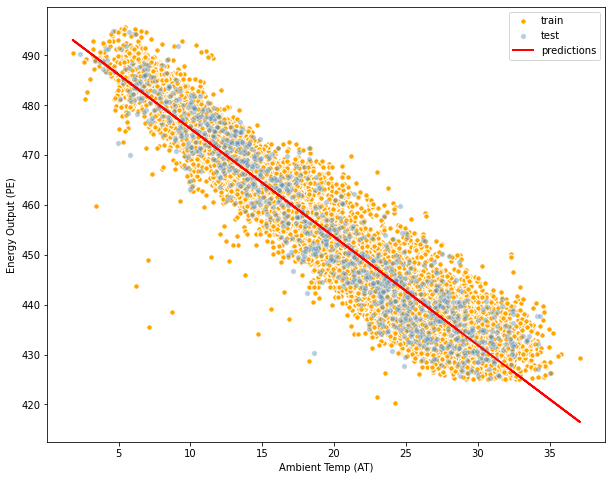

In [5]:
# Let's use a Simple Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train,y_train)

# Look at how well the model is fitting the data
plt.figure(figsize=(10,8))
plt.scatter(X_train,y_train,color='orange',edgecolor='white',s=30,label='train') # Plot training data
plt.scatter(X_test,y_test,color='steelblue',edgecolor='white',s=30,alpha=0.4,label='test') # Plot test data
plt.plot(X_train,model.predict(X_train),color='red',lw=2,label='predictions') # Plot predictions
plt.xlabel('Ambient Temp (AT)')
plt.ylabel('Energy Output (PE)')
plt.legend()
plt.show()

# Get the predictions on the training and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

Now let's use some error metrics to evaluate performance on the training and test sets.  Complete the below functions to calculate the MSE, MAE and R-squared values for the predictions provided as inputs to the function.  You may use NumPy but may NOT use scikit-learn to complete the functions.

In [6]:
def calc_mse(actuals,preds):
    '''
    Calculate and return the MSE of the predictions
    '''
    ### BEGIN SOLUTION ###
    mse = np.mean((actuals-preds)**2)
    return mse
    ### END SOLUTION ###
    raise NotImplementedError
    
def calc_mae(actuals,preds):
    '''
    Calculate and return the MAE of the predictions
    '''
    ### BEGIN SOLUTION ###
    mae = np.mean(np.abs(actuals-preds))
    return mae
    ### END SOLUTION ###
    raise NotImplementedError
    
def calc_r_squared(actuals,preds):
    '''
    Calculate and return the R-squared of the predictions
    '''
    ### BEGIN SOLUTION ###
    rsqr = 1-np.sum((actuals-preds)**2)/np.sum((actuals-np.mean(actuals))**2)
    return rsqr
    ### END SOLUTION ###
    raise NotImplementedError

In [7]:
# Compare your calculations versus using the scikit-learn methods

# Calculate MSE
your_train_mse = calc_mse(y_train,train_preds)
your_test_mse = calc_mse(y_test,test_preds)
print('Your MSE train: {:.3f}, test: {:.3f}'.format(your_train_mse,your_test_mse))
train_mse = mean_squared_error(y_train,train_preds)
test_mse = mean_squared_error(y_test,test_preds)
print('MSE train: {:.3f}, test: {:.3f} \n'.format(train_mse,test_mse))
assert np.round(your_train_mse,3) == np.round(train_mse,3)
assert np.round(your_test_mse,3) == np.round(test_mse,3)

# Calculate MAE
your_train_mae = calc_mae(y_train,train_preds)
your_test_mae = calc_mae(y_test,test_preds)
print('Your MAE train: {:.3f}, test: {:.3f}'.format(your_train_mae,your_test_mae))
train_mae = mean_absolute_error(y_train,train_preds)
test_mae = mean_absolute_error(y_test,test_preds)
print('MAE train: {:.3f}, test: {:.3f} \n'.format(train_mae,test_mae))
assert np.round(your_train_mae,3) == np.round(train_mae,3)
assert np.round(your_test_mae,3) == np.round(test_mae,3)

# Calculate R-squared
your_train_rsqr = calc_r_squared(y_train,train_preds)
your_test_rsqr = calc_r_squared(y_test,test_preds)
print('Your R-squared train: {:.3f}, test: {:.3f}'.format(your_train_rsqr,your_test_rsqr))
train_r2 = r2_score(y_train,train_preds)
test_r2 = r2_score(y_test,test_preds)
print('R-squared train: {:.3f}, test: {:.3f}'.format(train_r2,test_r2))
assert np.round(your_train_rsqr,3) == np.round(train_r2,3)
assert np.round(your_test_rsqr,3) == np.round(test_r2,3)

Your MSE train: 29.605, test: 27.874
MSE train: 29.605, test: 27.874 

Your MAE train: 4.297, test: 4.206
MAE train: 4.297, test: 4.206 

Your R-squared train: 0.898, test: 0.909
R-squared train: 0.898, test: 0.909
